# Creating Alexnet Model using Subclassing

## Constructor

- super(MyModel, self).__init__() is calling the __init__ method of the tf.keras.Model class, the base class of MyModel.

- By calling the __init__ method of the base class, we are initializing the necessary components for our custom model. This includes creating an empty list to hold the layers of our model, setting the trainable attribute to True, and other necessary attributes.

- The super() function returns a temporary object of the superclass, which allows you to call its methods. In this case, we are calling the __init__ method of the superclass, tf.keras.Model. We pass MyModel and self as arguments to the super() function, which allows us to call the __init__ method of the superclass with the self argument.

## Input Layer
In a neural network, the input layer is the first layer of the network that receives the input data. It serves as a pass-through layer that simply passes the input data to the first hidden layer of the network. The input layer is typically defined to have the same shape as the input data, and each neuron in the input layer corresponds to a feature or attribute of the input data.

For example, in an image classification task, the input layer of a neural network would have neurons corresponding to each pixel in the input image. The number of neurons in the input layer is equal to the product of the height, width, and depth (number of channels) of the input image.

In TensorFlow, an input layer can be created using the tf.keras.layers.Input function or the tf.keras.Input function. The input layer is typically the first layer in the model's architecture, and its output is passed to the next layer in the model.


- **tf.keras.layers.Input** is a layer class that can be used to create an input layer in a functional API model. It takes a shape argument that specifies the shape of the input data.

- **tf.keras.Input** is a function that returns a symbolic tensor, which can be used as the input to a Keras model. It also takes a shape argument that specifies the shape of the input data.

- Both tf.keras.layers.Input and tf.keras.Input can be used to create an input layer in a TensorFlow model. The difference between them is that tf.keras.layers.Input is a layer class that can be added to a model like any other layer, whereas tf.keras.Input is a function that returns a tensor object that can be passed to other layers in a model.

# Specifying Activation

In TensorFlow, there are several ways to specify activation functions for a layer:

- Using a string name: The name of the activation function can be specified as a string when defining a layer. For example, tf.keras.layers.Dense(64, activation='relu') would create a fully connected layer with 64 units and a ReLU activation function.The advantage of this method is its simplicity and ease of use. TensorFlow provides a variety of activation functions that can be used in this way, including "relu", "sigmoid", "tanh", "softmax", and more.

Under the hood, when a layer object is initialized with a string for the activation parameter, TensorFlow will automatically create an instance of the corresponding activation function and use it as the activation function for the layer. This is done using TensorFlow's built-in get_activation function, which maps string names to activation functions.

- Using a callable: A callable function can also be passed as the activation argument when defining a layer. For example, tf.keras.layers.Dense(64, activation=tf.nn.relu) would create a fully connected layer with 64 units and a ReLU activation function defined using the tf.nn.relu function.

- Using the activation method: The activation method of a layer object can be used to specify the activation function for that layer after it has been created. For example, layer.activation = tf.nn.relu would set the activation function for the layer object to the ReLU function.

- Using a separate activation layer: In some cases, it may be desirable to separate the activation function from the layer itself. This can be done by creating a separate activation layer and specifying it as a separate layer in the model. For example, tf.keras.layers.Dense(64) would create a fully connected layer with 64 units, and tf.keras.layers.Activation('relu') would create a separate activation layer with a ReLU activation function. These layers could then be combined in the model using the functional API.

## Call method

- In TensorFlow, the call method is a special method defined in a Keras model or layer class that specifies the computation performed by the model or layer. When you call a Keras model or layer object with an input tensor, the call method is invoked to perform the forward pass computation and generate the output tensor.

- The call method takes an input tensor as its argument and returns an output tensor. It specifies the computation that should be performed on the input tensor to produce the output tensor. This computation typically involves applying a series of transformations to the input tensor using weights and biases stored in the model or layer object.

- The call method is where the actual work of the model or layer is done, so it is a critical component of any Keras model or layer. By defining the call method for your model or layer class, you can specify exactly how the model or layer should behave when it is called with input data.





In [48]:
import tensorflow as tf

In [49]:
# using subclassing technique
class AlexNet(tf.keras.Model):

    def __init__(self):
        super(AlexNet, self).__init__()

        # input layer , input_shape = (224,224,3)
        self.input_layer = tf.keras.layers.InputLayer(input_shape=(None,224,224,3))

        # Conv1 filters=96, size= 11*11, stride= 4, activation= relu
        self.conv1 = tf.keras.layers.Conv2D( filters=96,
                                       kernel_size=(11,11),
                                       strides=4,
                                       activation="relu"
                                       )
        
        #maxpool1 size=5*5, stride=2
        self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(5,5), strides=2)

        # Conv2 filters=256, size= 5*5, stride= 1, padding=2 ,activation= relu
        self.conv2 = tf.keras.layers.Conv2D(filters=256,
                                       kernel_size=(5,5),
                                       strides=1,
                                       padding="same",
                                       activation="relu")
        
        #maxpool2 size=3*3, stride=2
        self.maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2)

        # Conv3 filters=384, size= 3*3, stride= 1, padding=1 ,activation= relu
        self.conv3 = tf.keras.layers.Conv2D(filters=384,
                                       kernel_size=(3,3),
                                       strides=1,
                                       padding="same",
                                       activation="relu")
        
        # Conv4 filters=384, size= 3*3, stride= 1, padding=1 ,activation= relu
        self.conv4 = tf.keras.layers.Conv2D(filters=384,
                                       kernel_size=(3,3),
                                       strides=1,
                                       padding="same",
                                       activation="relu")
        
        # Conv5 filters=256, size= 3*3, stride= 1, padding=1 ,activation= relu
        self.conv5 = tf.keras.layers.Conv2D(filters=256,
                                       kernel_size=(3,3),
                                       strides=1,
                                       padding="same",
                                       activation="relu")
        
        #maxpool3 size=3*3, stride=2
        self.maxpool3 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2)

        #dropout rate=0.5
        self.dropout1 = tf.keras.layers.Dropout(rate=0.5)

        # Fully Connected Layer filetrs=4096 , activation= relu
        self.fully_connected1 = tf.keras.layers.Dense(units=4096, activation="relu")

        #droput rate=0.5
        self.dropout2 = tf.keras.layers.Dropout(rate=0.5)

        # Fully Connected Layer filetrs=4096 , activation= relu
        self.fully_connected2 = tf.keras.layers.Dense(units=4096, activation="relu")

        # Fully Connected Layer filetrs=1000 , activation= softmax
        self.output_layer = tf.keras.layers.Dense(units=1000, activation="softmax")

    
    def call(self, inputs):

        x = self.conv1(inputs)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.maxpool3(x)
        x = self.dropout1(x)
        x = self.fully_connected1(x)
        x = self.dropout2(x)
        x = self.fully_connected2(x)
        output = self.output_layer(x)      

        return output

In [50]:
model = AlexNet()
input_shape = (None,224, 224, 3)
model.build(input_shape)
model.summary()

Model: "alex_net_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, None, 224, 224,   0         
                             3)]                                 
                                                                 
 conv2d_57 (Conv2D)          multiple                  34944     
                                                                 
 max_pooling2d_33 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          multiple                  614656    
                                                                 
 max_pooling2d_34 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                       

In [51]:
# Print layer configurations
for layer in model.layers:
    print(layer.get_config())

{'batch_input_shape': (None, None, 224, 224, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_16'}
{'name': 'conv2d_57', 'trainable': True, 'dtype': 'float32', 'filters': 96, 'kernel_size': (11, 11), 'strides': (4, 4), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_33', 'trainable': True, 'dtype': 'float32', 'pool_size': (5, 5), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_58', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 

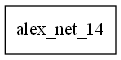

In [52]:
from tensorflow.keras.utils import plot_model
# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True)